<a href="https://colab.research.google.com/github/IzzahAlfatih/Tugas-Python/blob/main/Tugas_13_Grafik_PathLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 13: Grafik PathLoss
Nama   : Muhammad Izzah Alfatih

NIM    : 1101190056

Kelas  : TT-43-G2


In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [55]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
locU='urban'
locS='suburban'
locO='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

LpUrban=cos(f3,locU,tower,user,d)
LpSuburban=cos(f3,locS,tower,user,d)
LpOpen=cos(f3,locO,tower,user,d)

Lp700=cos(f1,locU,tower,user,d)
Lp900=cos(f2,locU,tower,user,d)
Lp1800=cos(f3,locU,tower,user,d)

In [56]:
d_sort=d[np.argsort(d)]

urban_sort=LpUrban[np.argsort(d)]
suburban_sort=LpSuburban[np.argsort(d)]
open_sort=LpOpen[np.argsort(d)]

f700_sort=Lp700[np.argsort(d)]
f900_sort=Lp900[np.argsort(d)]
f1800_sort=Lp1800[np.argsort(d)]

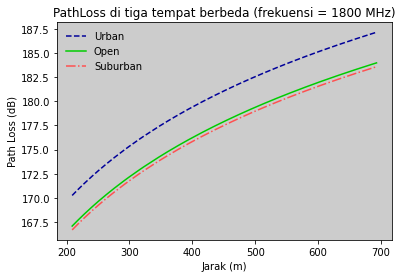

In [57]:
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,urban_sort,'#000099',linestyle='--', label='Urban')
plt.plot(d_sort,open_sort,'#00cc00',linestyle='-', label='Open')
plt.plot(d_sort,suburban_sort,'#ff5050',linestyle='-.', label='Suburban')

plt.legend()
plt.title('PathLoss di tiga tempat berbeda (frekuensi = 1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

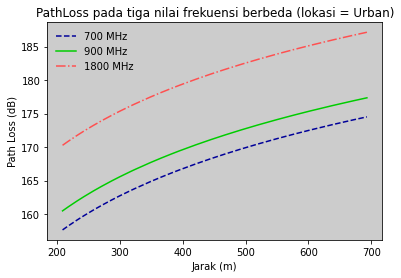

In [58]:
plt.figure()
plt.rcParams['axes.facecolor'] = '#cccccc'

plt.plot(d_sort,f700_sort,'#000099',linestyle='--', label='700 MHz')
plt.plot(d_sort,f900_sort,'#00cc00',linestyle='-', label='900 MHz')
plt.plot(d_sort,f1800_sort,'#ff5050',linestyle='-.', label='1800 MHz')

plt.legend()
plt.title('PathLoss pada tiga nilai frekuensi berbeda (lokasi = Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()